# Zero to Hero

## 1.04 Transformado (innecesariamente) las variables

El objetivo de esta sección es analizar el efecto que tiene sobre el arbol de decision
* Variables Colineales
* Normalizacion de Variables
* Transformada logarítmica
* Outliers

In [1]:
rm( list=ls())
gc()

library( "data.table")   #cargo la libreria  data.table
library( "rpart")  #cargo la libreria  rpart
library( "rpart.plot")

options(repr.plot.width=20, repr.plot.height=10) 
setwd("C:/_MCD/Labo1/code")


,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,604593,32.3,1292120,69.1,1292120,69.1
Vcells,1087272,8.3,8388608,64.0,1632674,12.5


In [2]:
dataset <- fread("./datasets/competencia1_2022.csv")   #cargo el dataset

Warning message:
"cex and tweak both specified, applying both"


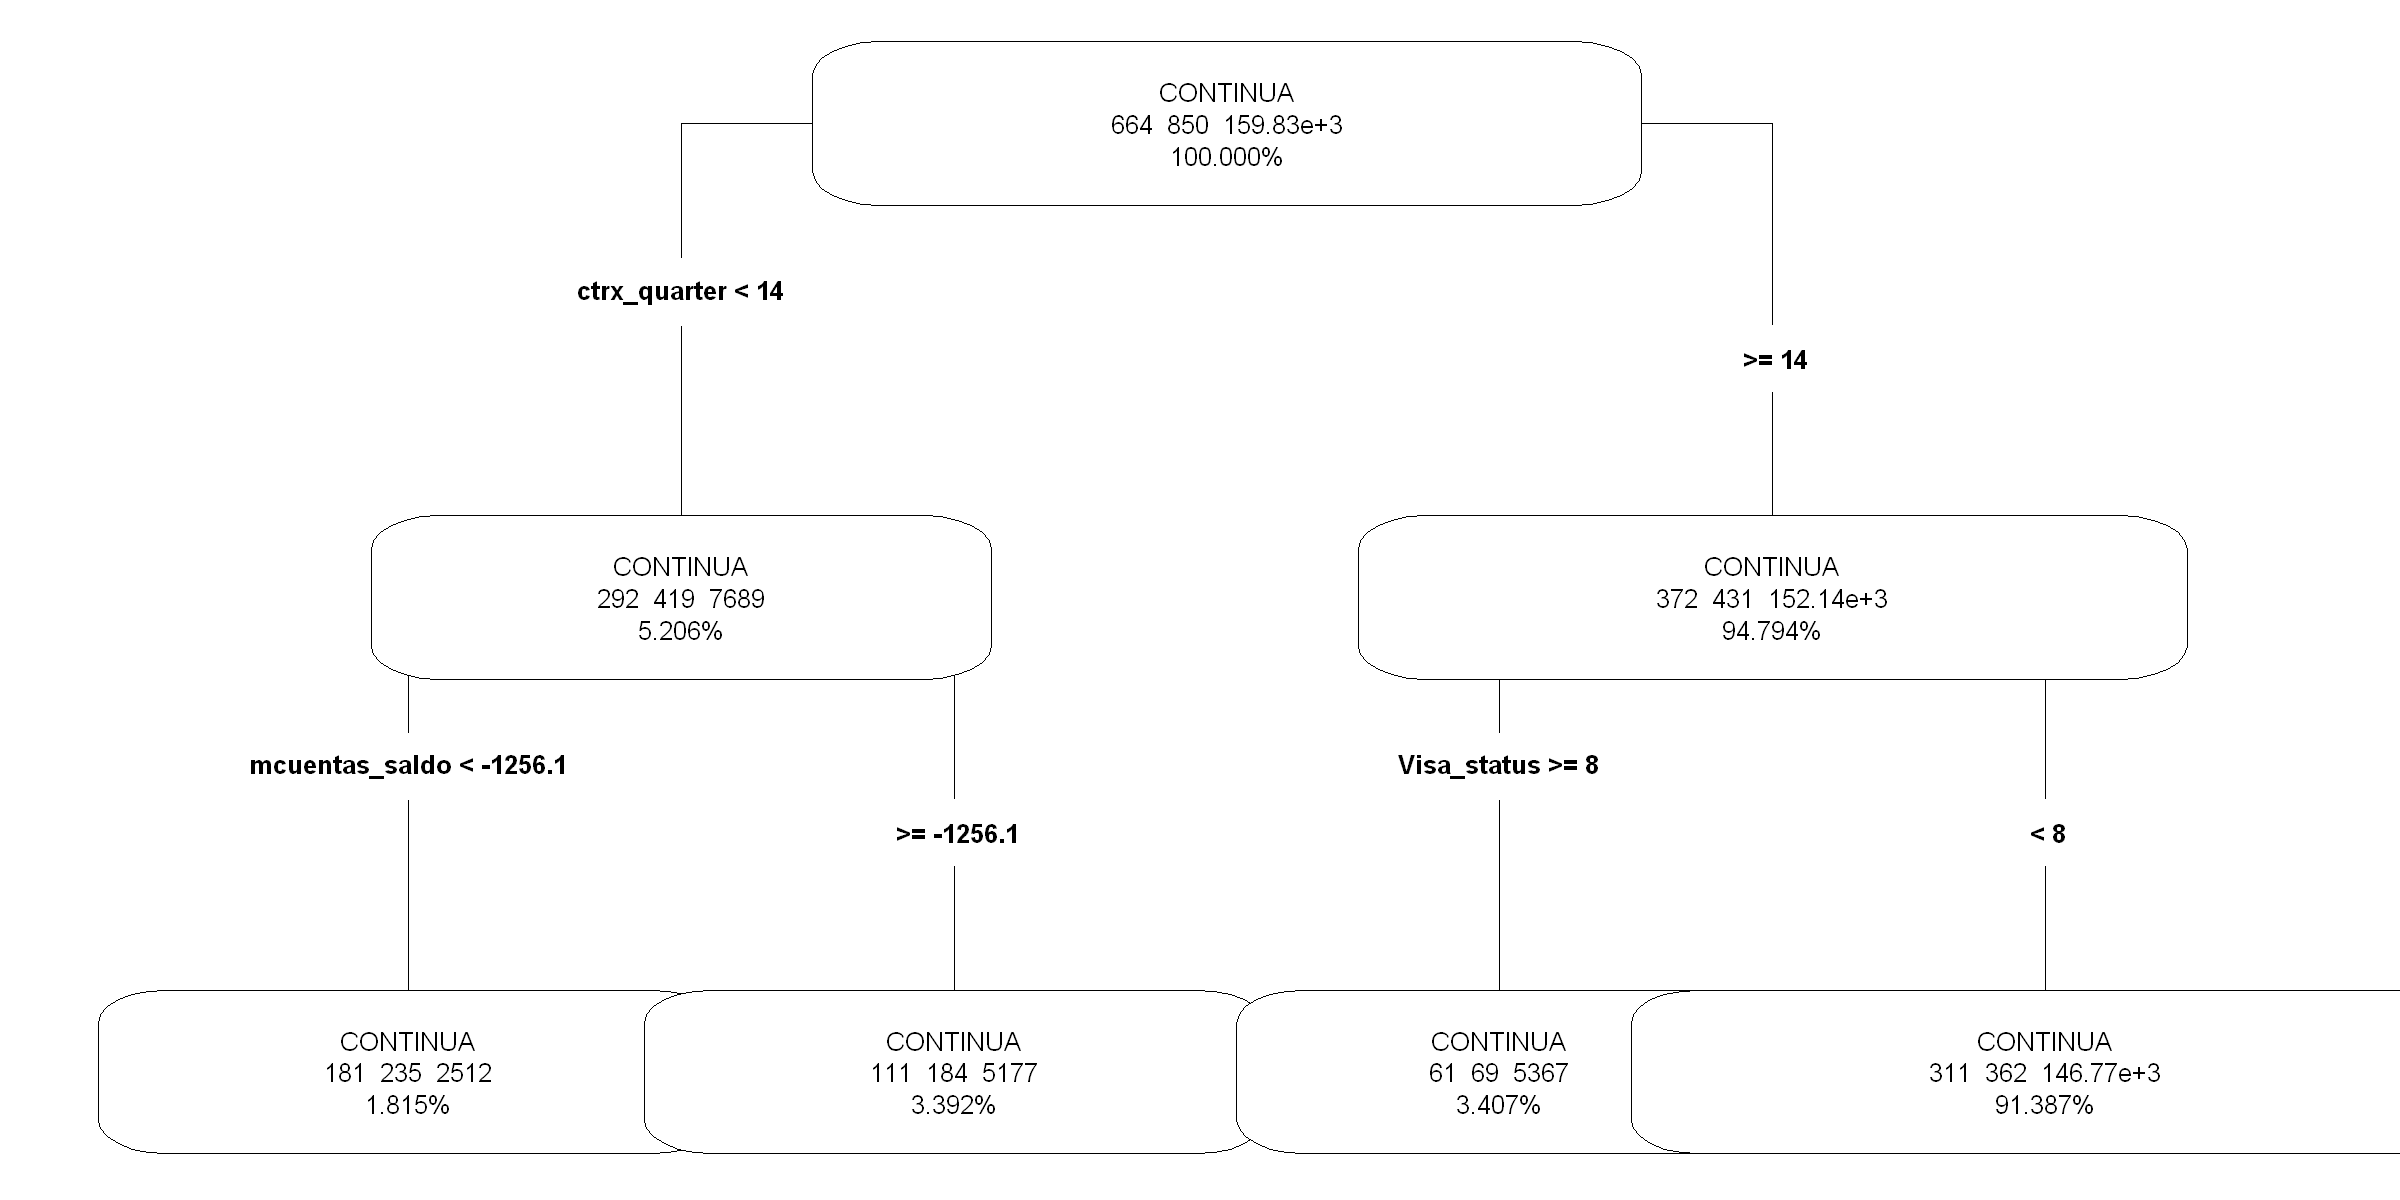

In [3]:
#genero el modelo
modelo <-  rpart(  formula= "clase_ternaria ~ ." ,
                   data= dataset[ foto_mes==202101],
                   xval= 0,
                   cp= -1,
                   maxdepth= 2 )

#imprimo el modelo graficamente
prp(modelo, extra=101, digits=5, branch=1, type=4, varlen=0, faclen=0, tweak=1.1, cex=1.2)

La variable mas importante que aparece es **ctrx_quarter**

## variables colineales

agrego al dataset tres variables colineales  con ctrx_quarter

In [ ]:
dataset[ foto_mes==202101 , ctrx_quarter_dos    :=  2*ctrx_quarter ]
dataset[ foto_mes==202101 , ctrx_quarter_tres   :=  3*ctrx_quarter ]
dataset[ foto_mes==202101 , ctrx_quarter_cuatro :=  4*ctrx_quarter ]

y vuelvo a correr el arbol de decision

In [ ]:
#genero el modelo
modelo <-  rpart(  formula= "clase_ternaria ~ ." ,
                   data= dataset[ foto_mes==202101],
                   xval= 0,
                   cp= -1,
                   maxdepth= 2 )

#imprimo el modelo graficamente
prp(modelo, extra=101, digits=5, branch=1, type=4, varlen=0, faclen=0, tweak=1.1, cex=1.2)

**SORPRENDENTE , el arbol de decision es inmune a las colinearidad de variables**
<br>
El arbol de decisión no ha cambiado. Su forma es exactamente igual, las cantidades en los nodos idéntica al arbol original.

##  Normalizacion de variables

Primero vuelvo a cargar el dataset

In [4]:
dataset <- fread("./datasets/competencia1_2022.csv")   #cargo el dataset

Analizo la variable  ctrx_quarter

In [5]:
min( dataset[ foto_mes==202101 , ctrx_quarter] )

[1] 0

In [6]:
max( dataset[ foto_mes==202101, ctrx_quarter] )

[1] 3251

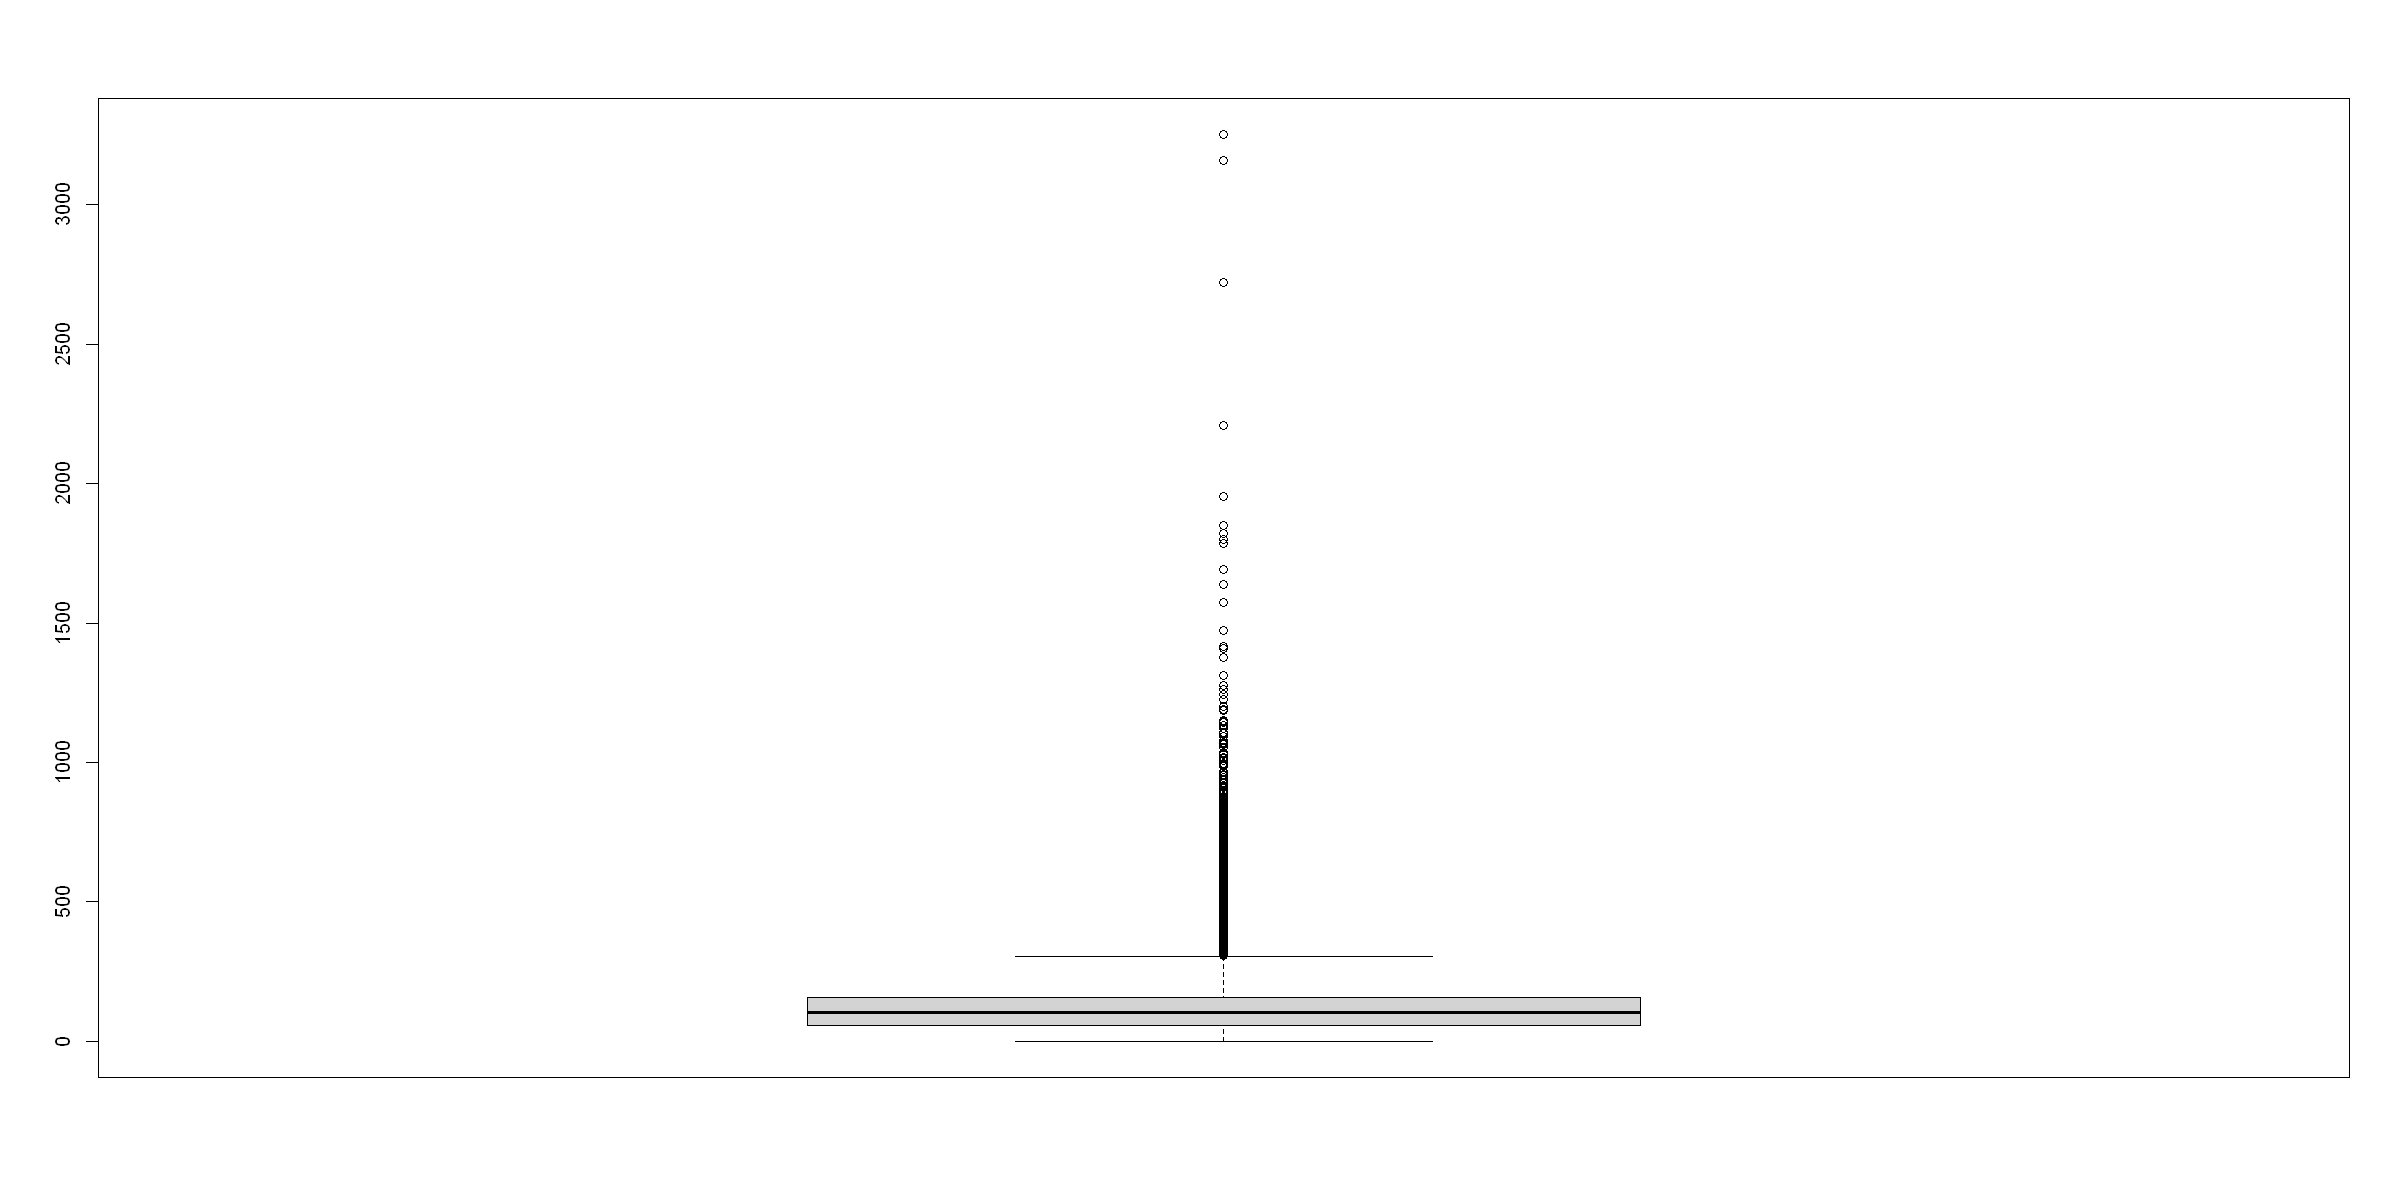

In [7]:
boxplot(  dataset[ foto_mes==202101, ctrx_quarter])

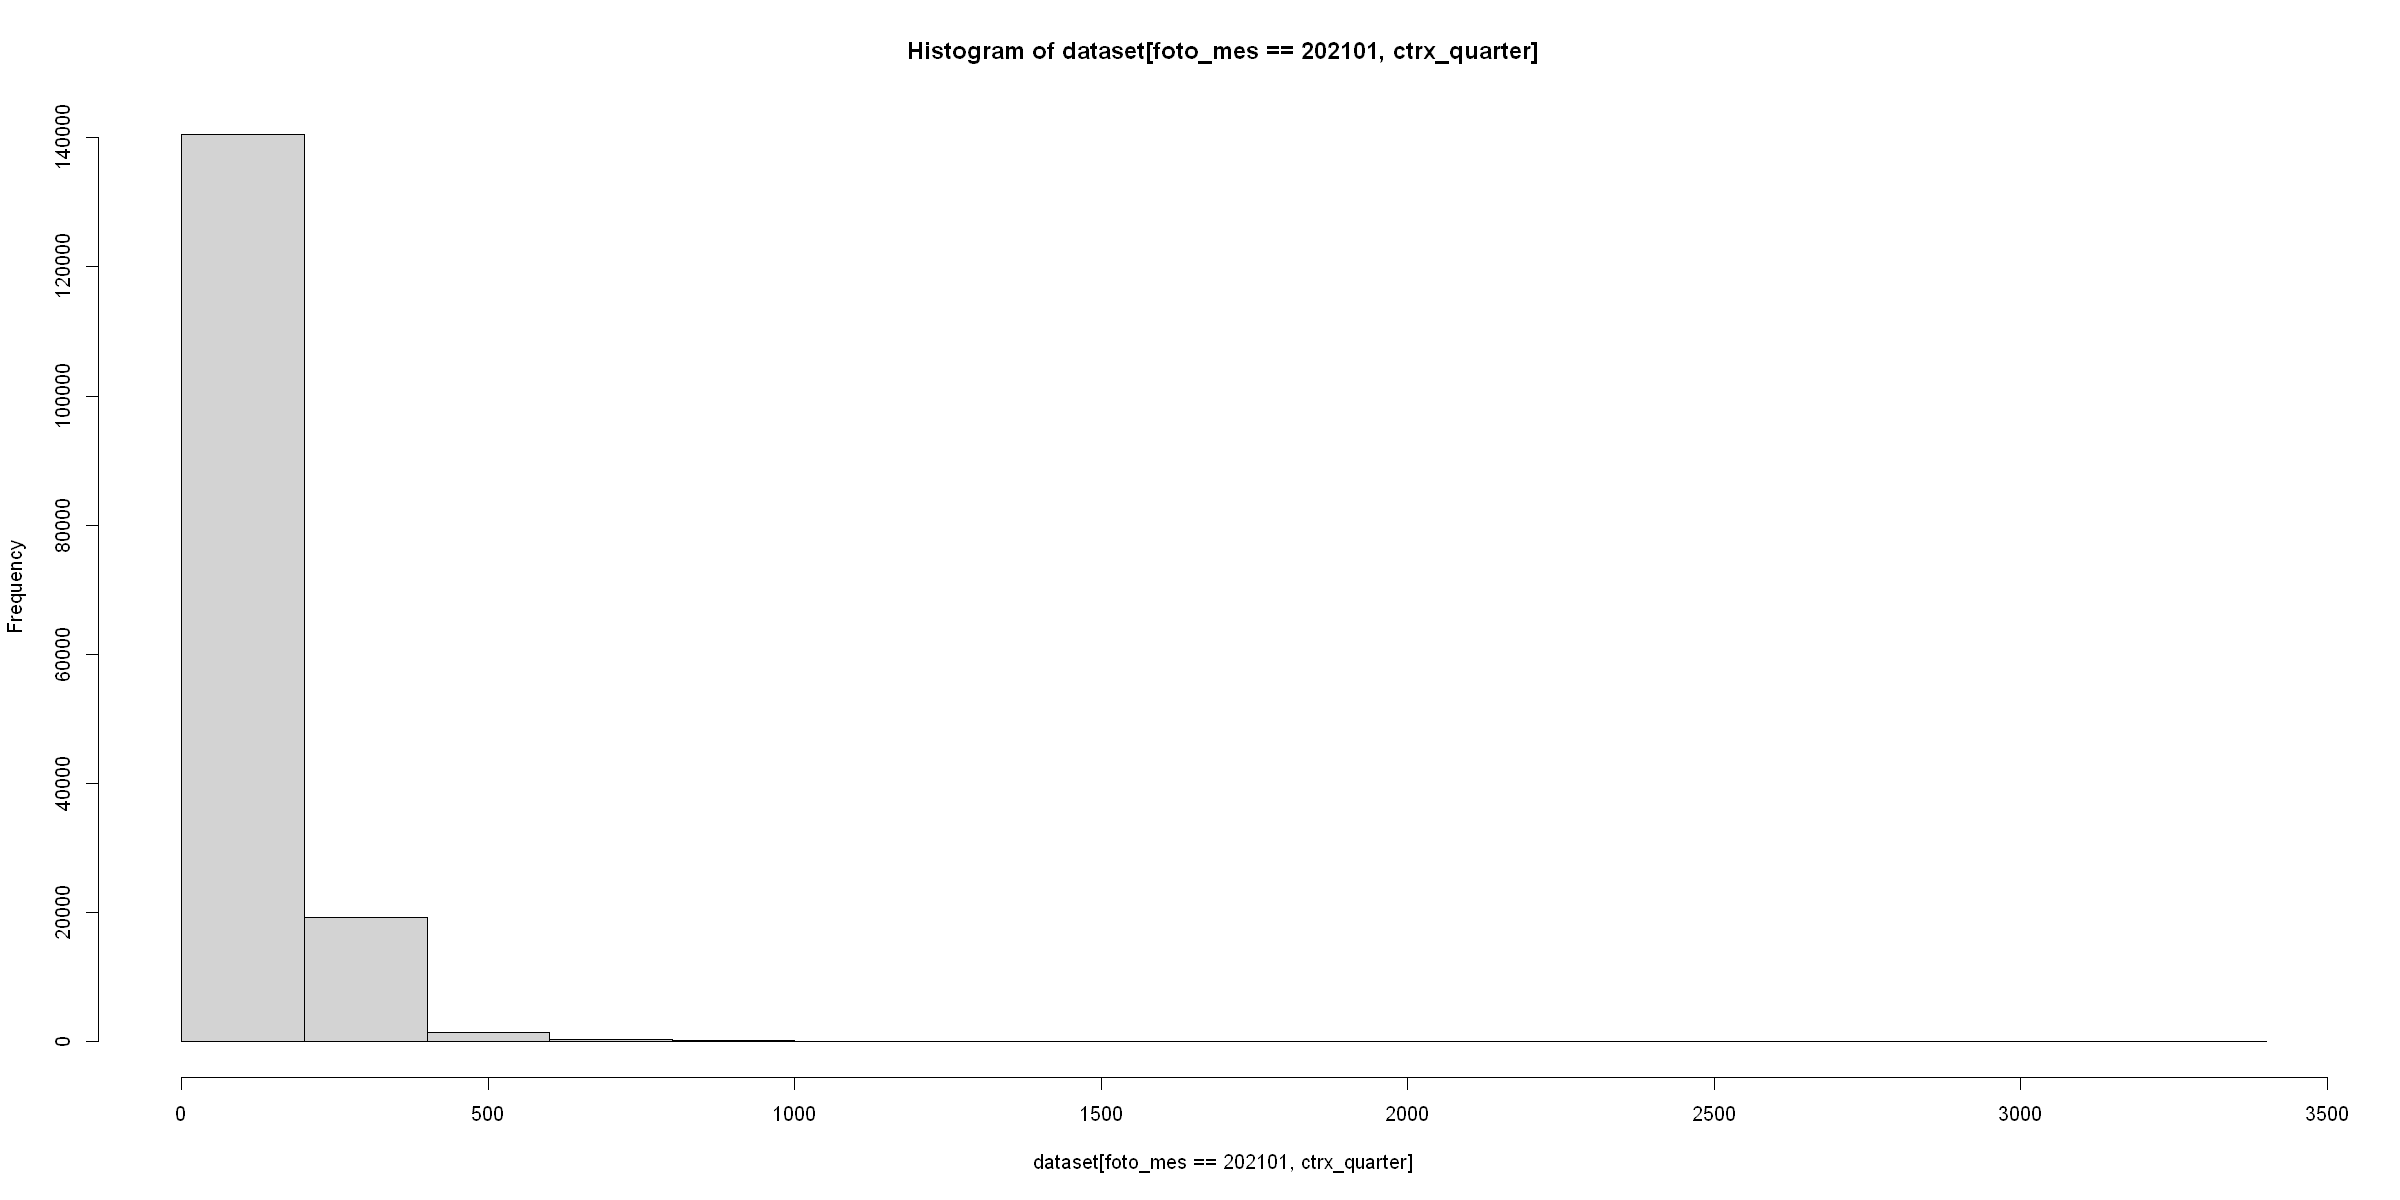

In [8]:
hist( dataset[ foto_mes==202101, ctrx_quarter] )

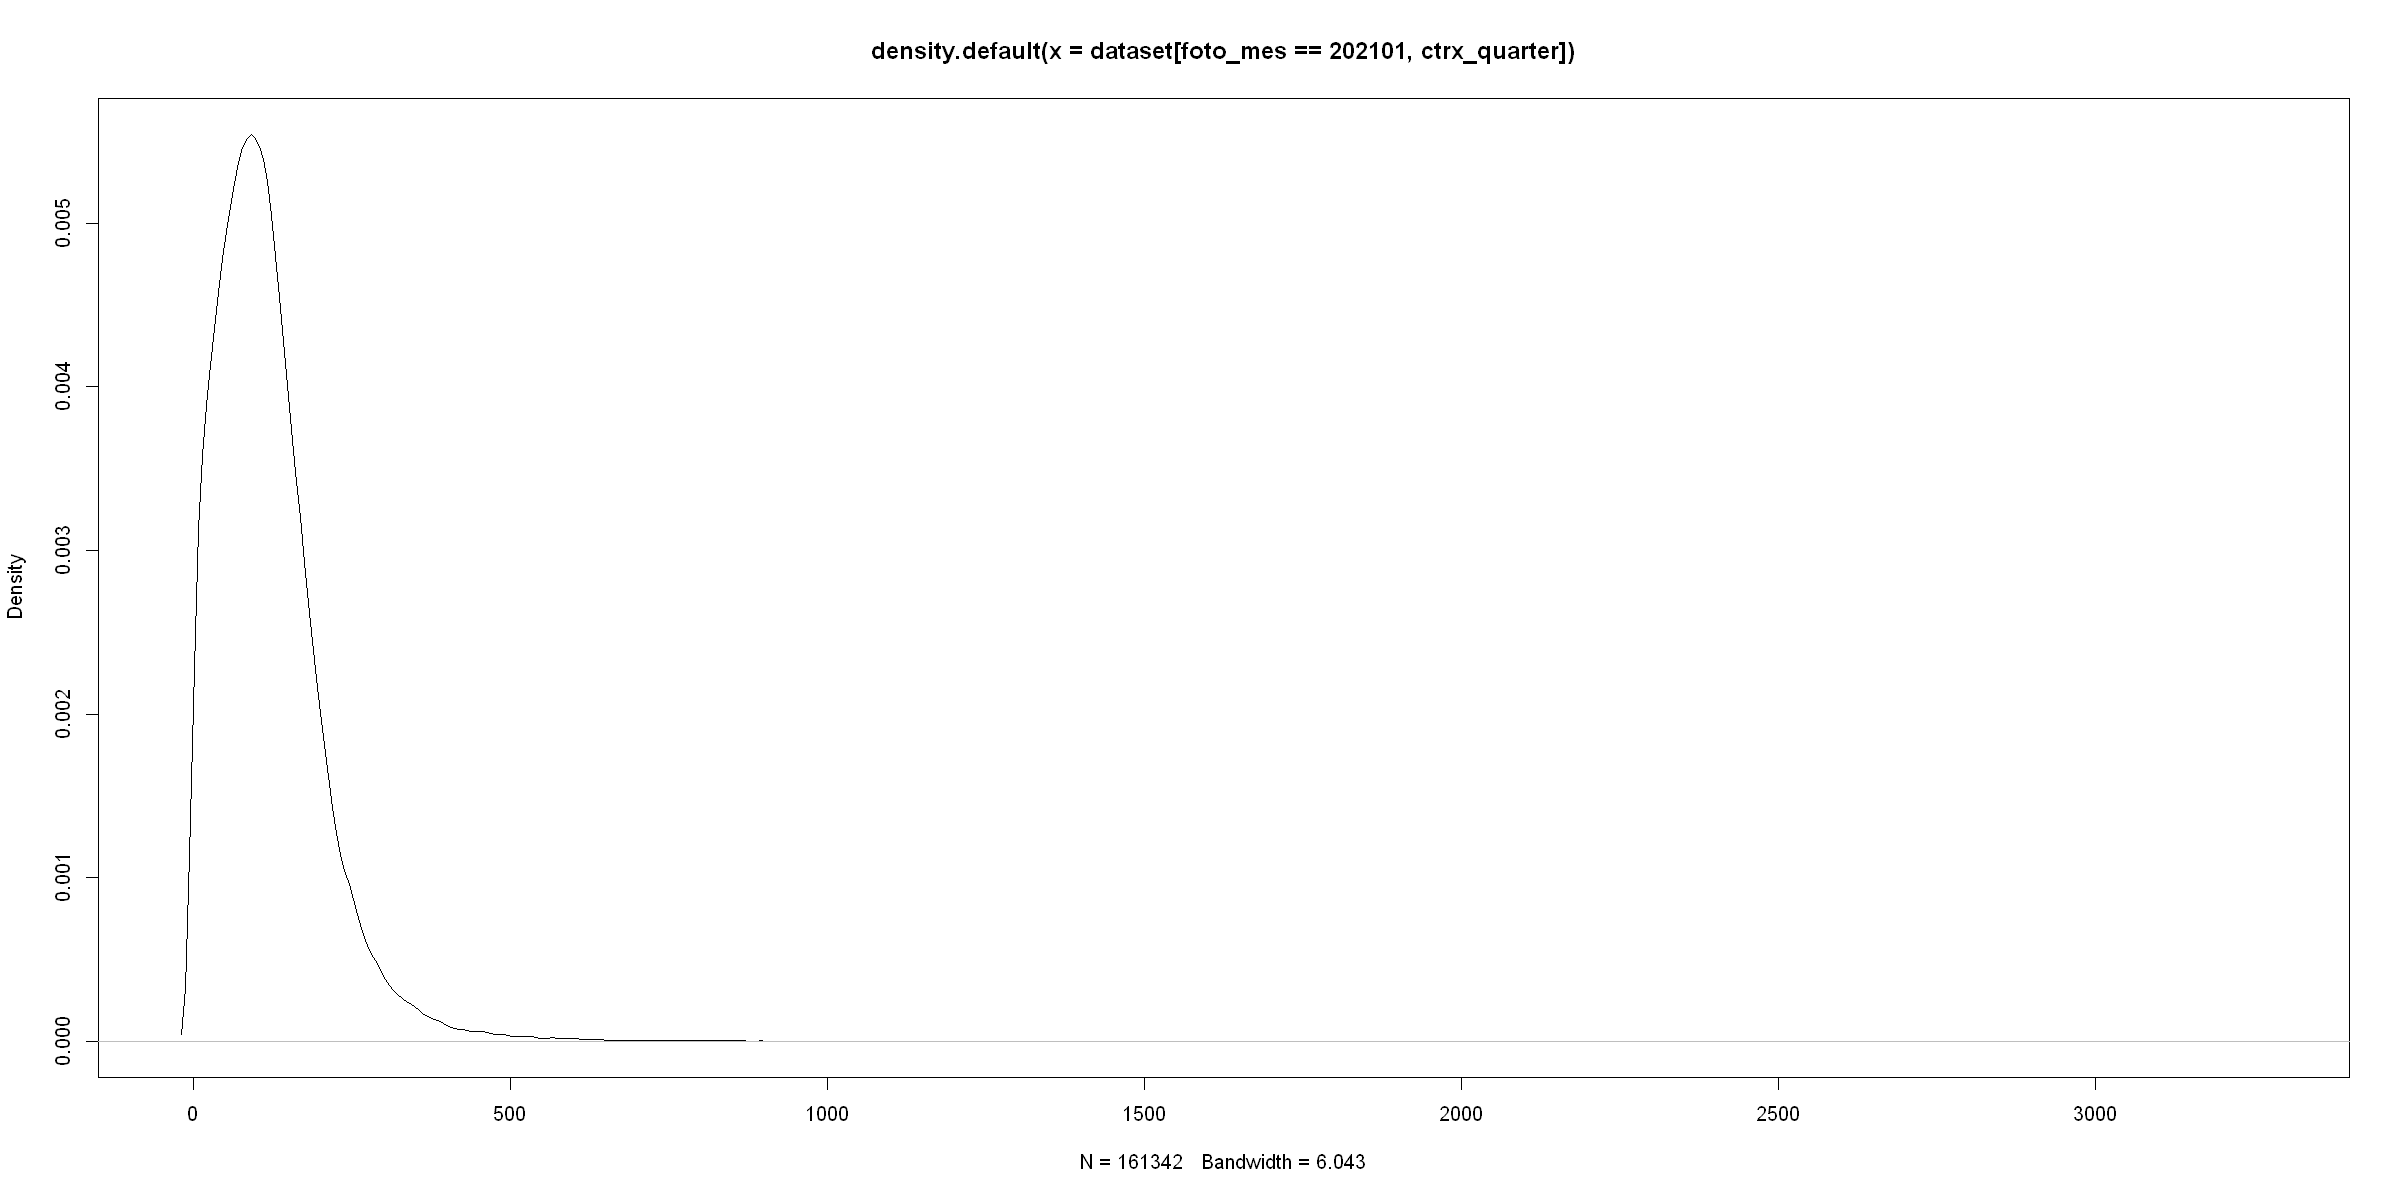

In [9]:
plot( density( dataset[ foto_mes==202101, ctrx_quarter] ) )

Normailzo  ctrx_quarter

In [10]:
dataset[ foto_mes==202101, ctrx_quarter_normalizado := scale(ctrx_quarter)]

confirmo que me quedó normalizada

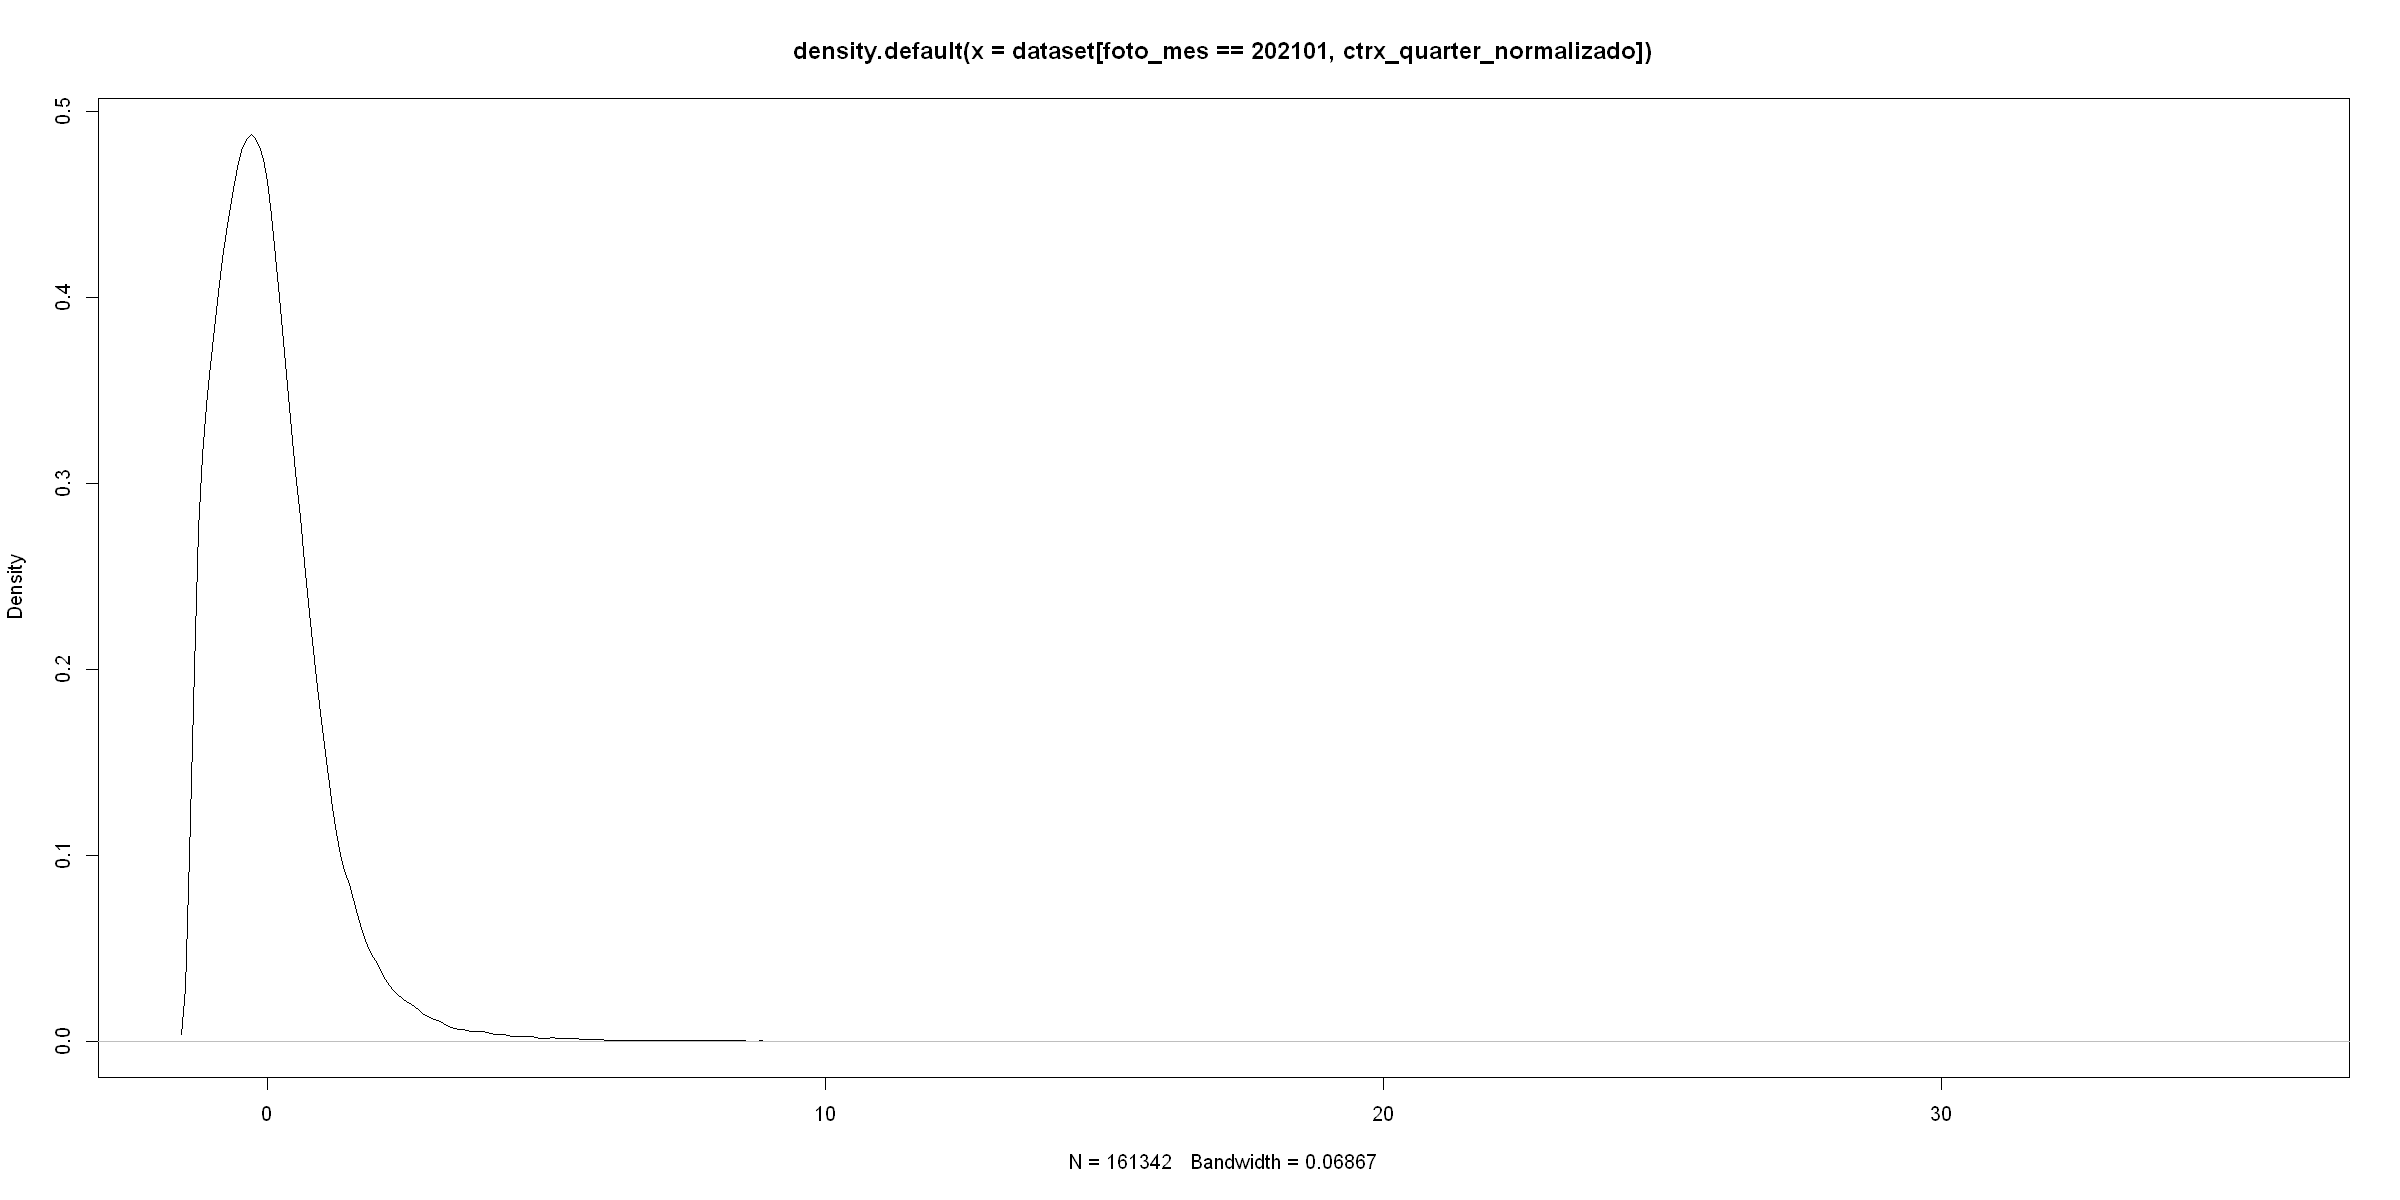

In [11]:
plot( density( dataset[foto_mes==202101, ctrx_quarter_normalizado] ) )

Confirmado, la variable está normalizada, ahora corremos nuevamente el arbol de decision

Warning message:
"cex and tweak both specified, applying both"


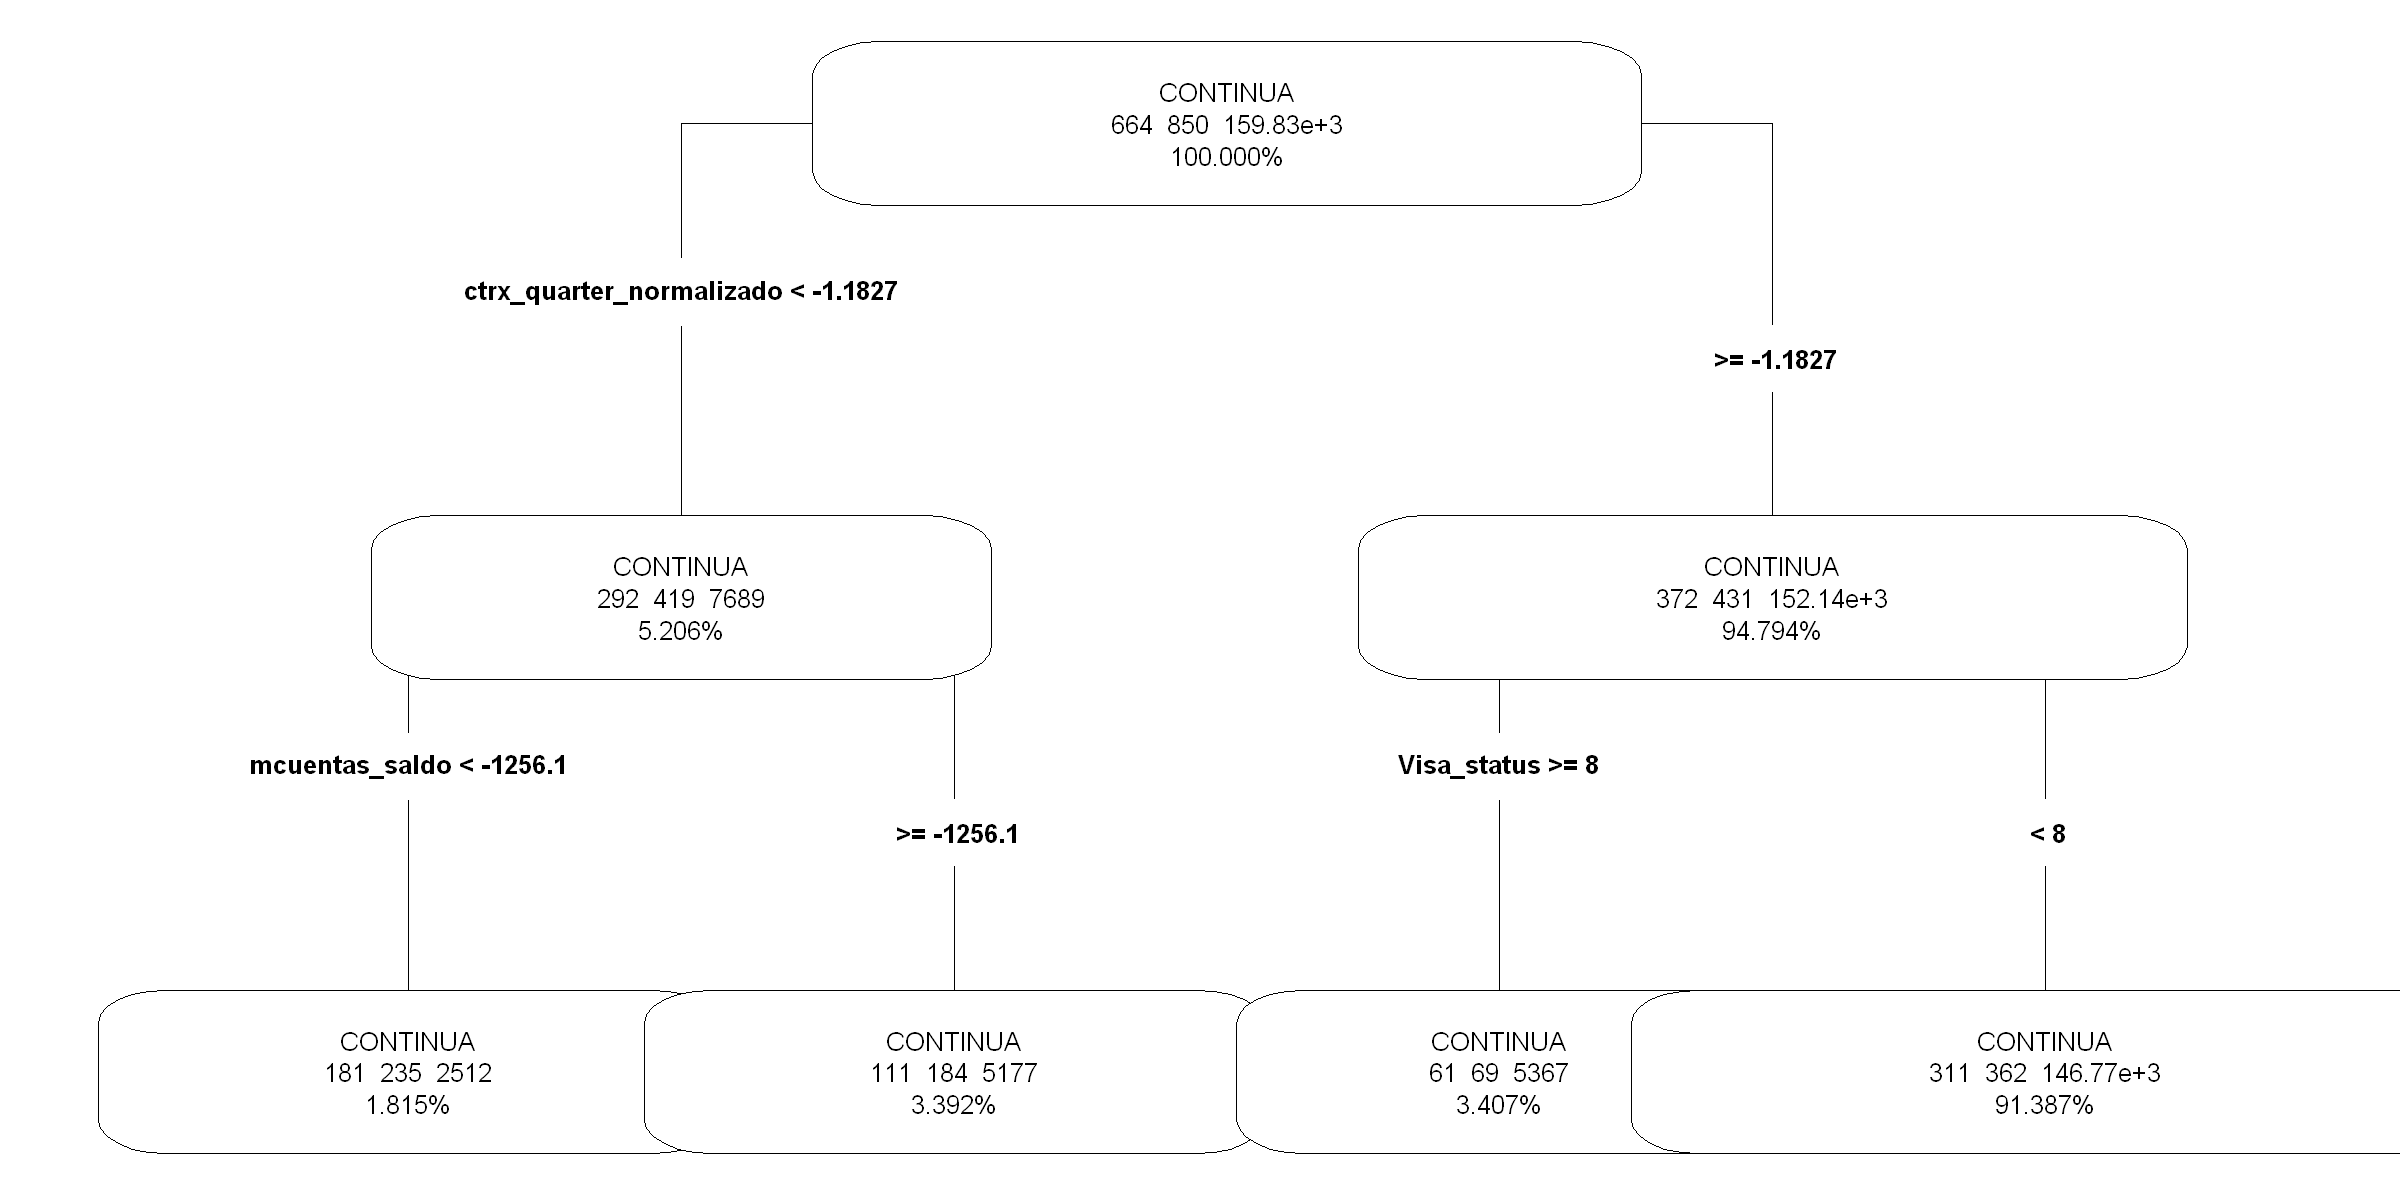

In [12]:
#genero el modelo
modelo <-  rpart(  formula= "clase_ternaria ~ . -ctrx_quarter" ,
                   data= dataset[ foto_mes==202101],
                   xval= 0,
                   cp= -1,
                   maxdepth= 2 )

#imprimo el modelo graficamente
prp(modelo, extra=101, digits=5, branch=1, type=4, varlen=0, faclen=0, tweak=1.1, cex=1.2)

**SORPRENDENTE , el arbol de decision es inmune a las normalizacion de variables**
<br>
El arbol de decisión no ha cambiado. Su forma es exactamente igual, las cantidades en los nodos idéntica al arbol original.
<br>

## Transformación  logaritmica

Primero vuelvo a cargar el dataset

In [13]:
dataset <- fread("./datasets/competencia1_2022.csv")   #cargo el dataset

hago la transformación logarítmica

ctrx_quarter es un numero mayor o igual a cero,  PERO  log(0) es menos infinito,  con lo cual voy a calcular log( ctrx_quarter + 1)

In [14]:
dataset[ foto_mes==202101 , ctrx_quarter_log :=log(ctrx_quarter+1)]  #sumo el uno porque no quiero infinitos

Ahora veo el boxplot

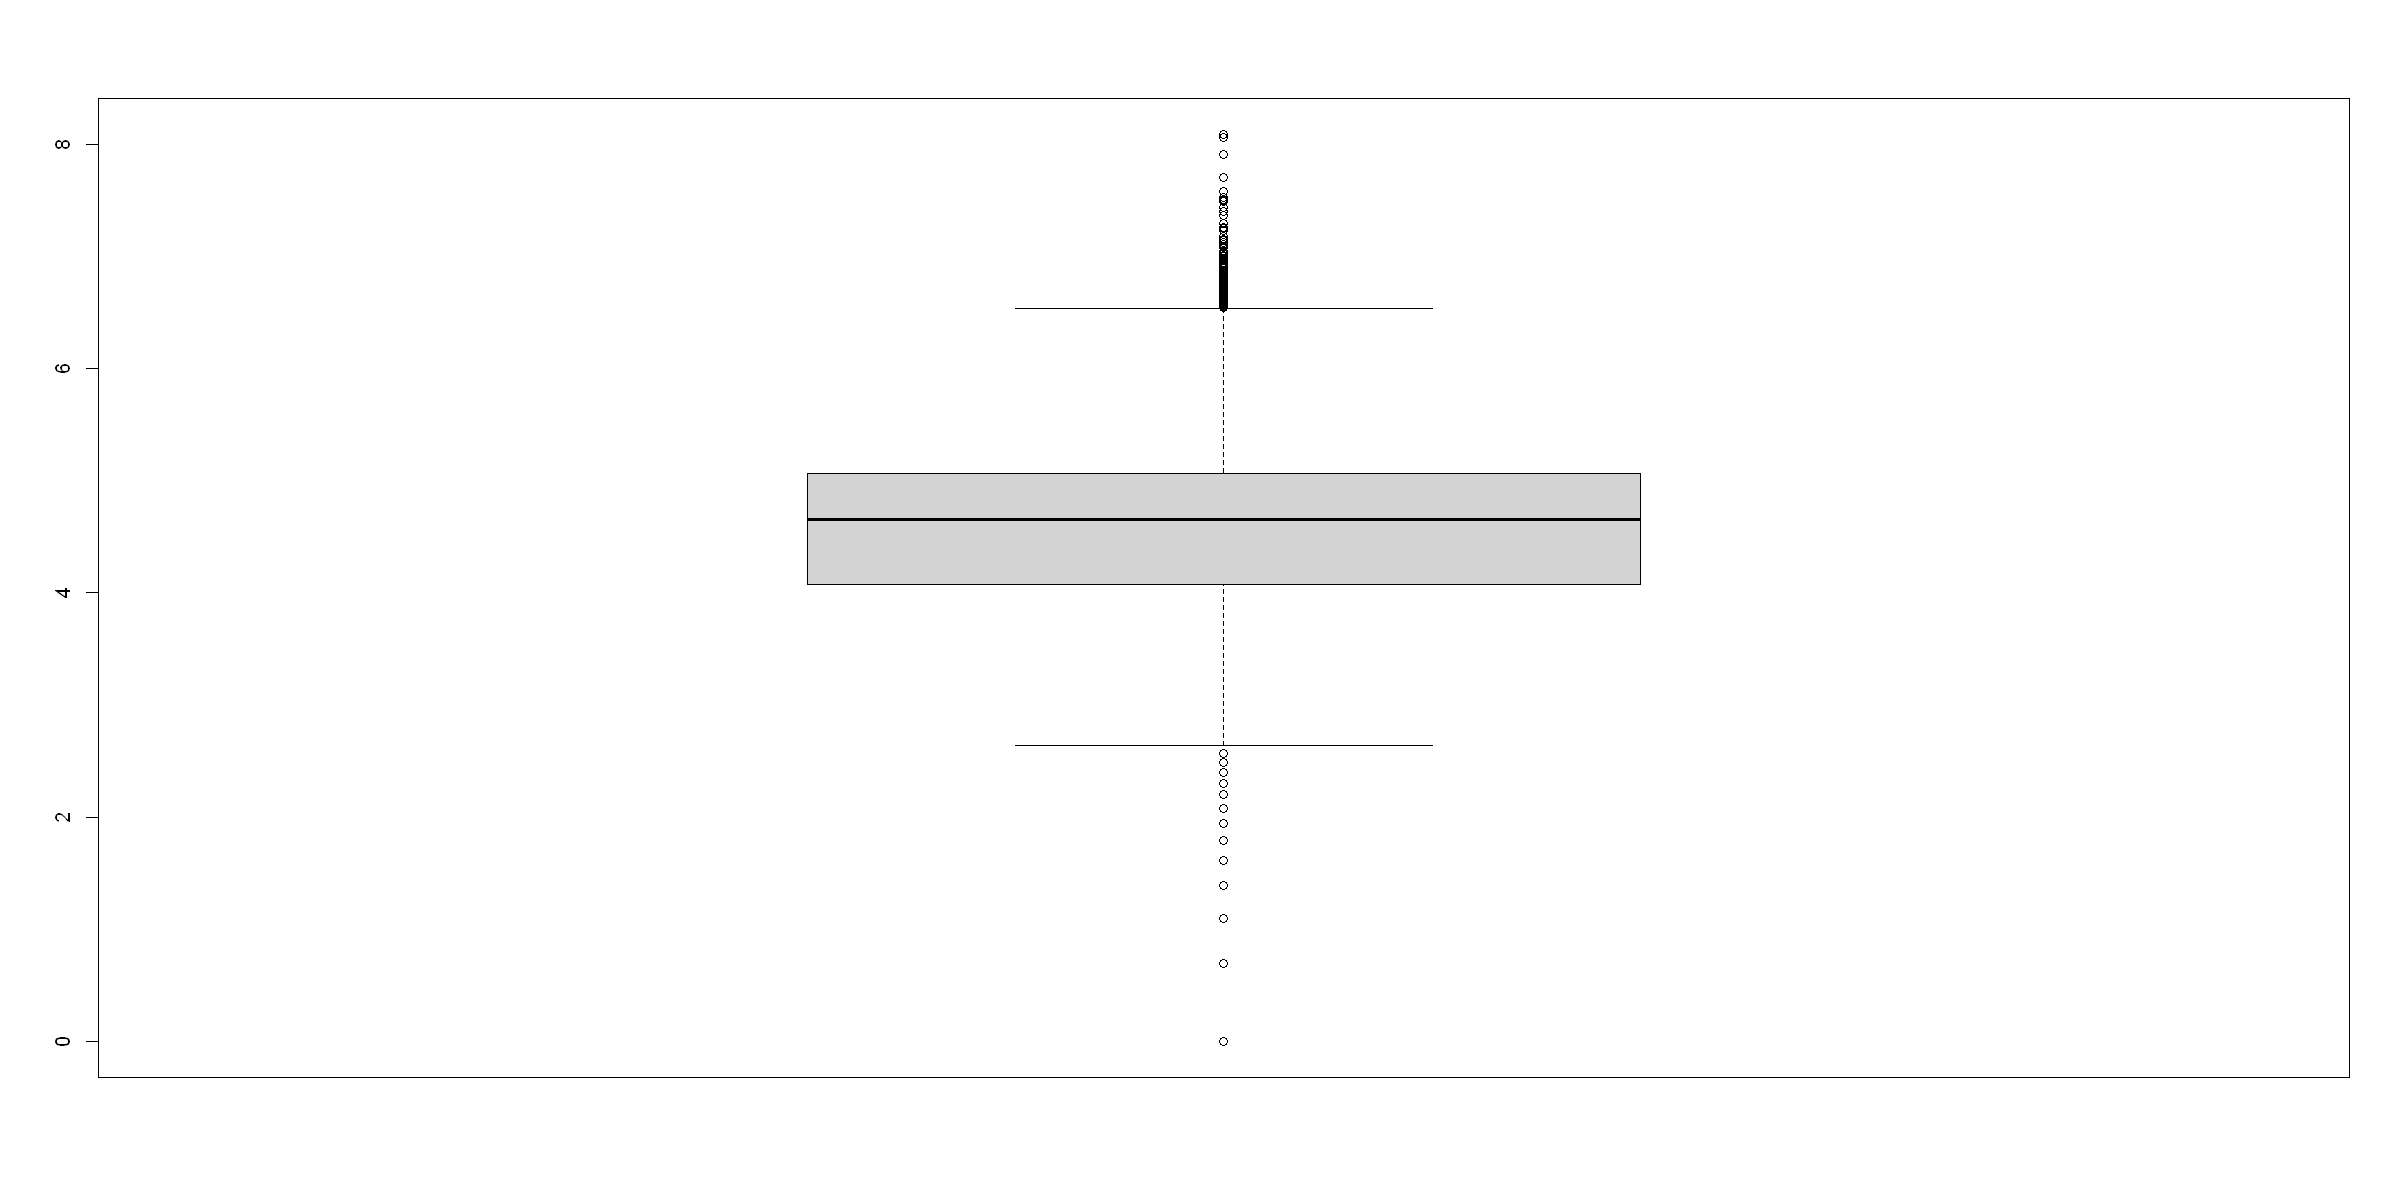

In [16]:
boxplot(  dataset[foto_mes==202101 , ctrx_quarter_log])

In [ ]:
plot( density( dataset[ foto_mes==202101, ctrx_quarter_log] ) )

Finalmente, el arbol de decision

Pero antes, ELIMINO del dataset la variable  ctrx_quarter , para que solo juegue  ctrx_quarter_log

Warning message:
"cex and tweak both specified, applying both"


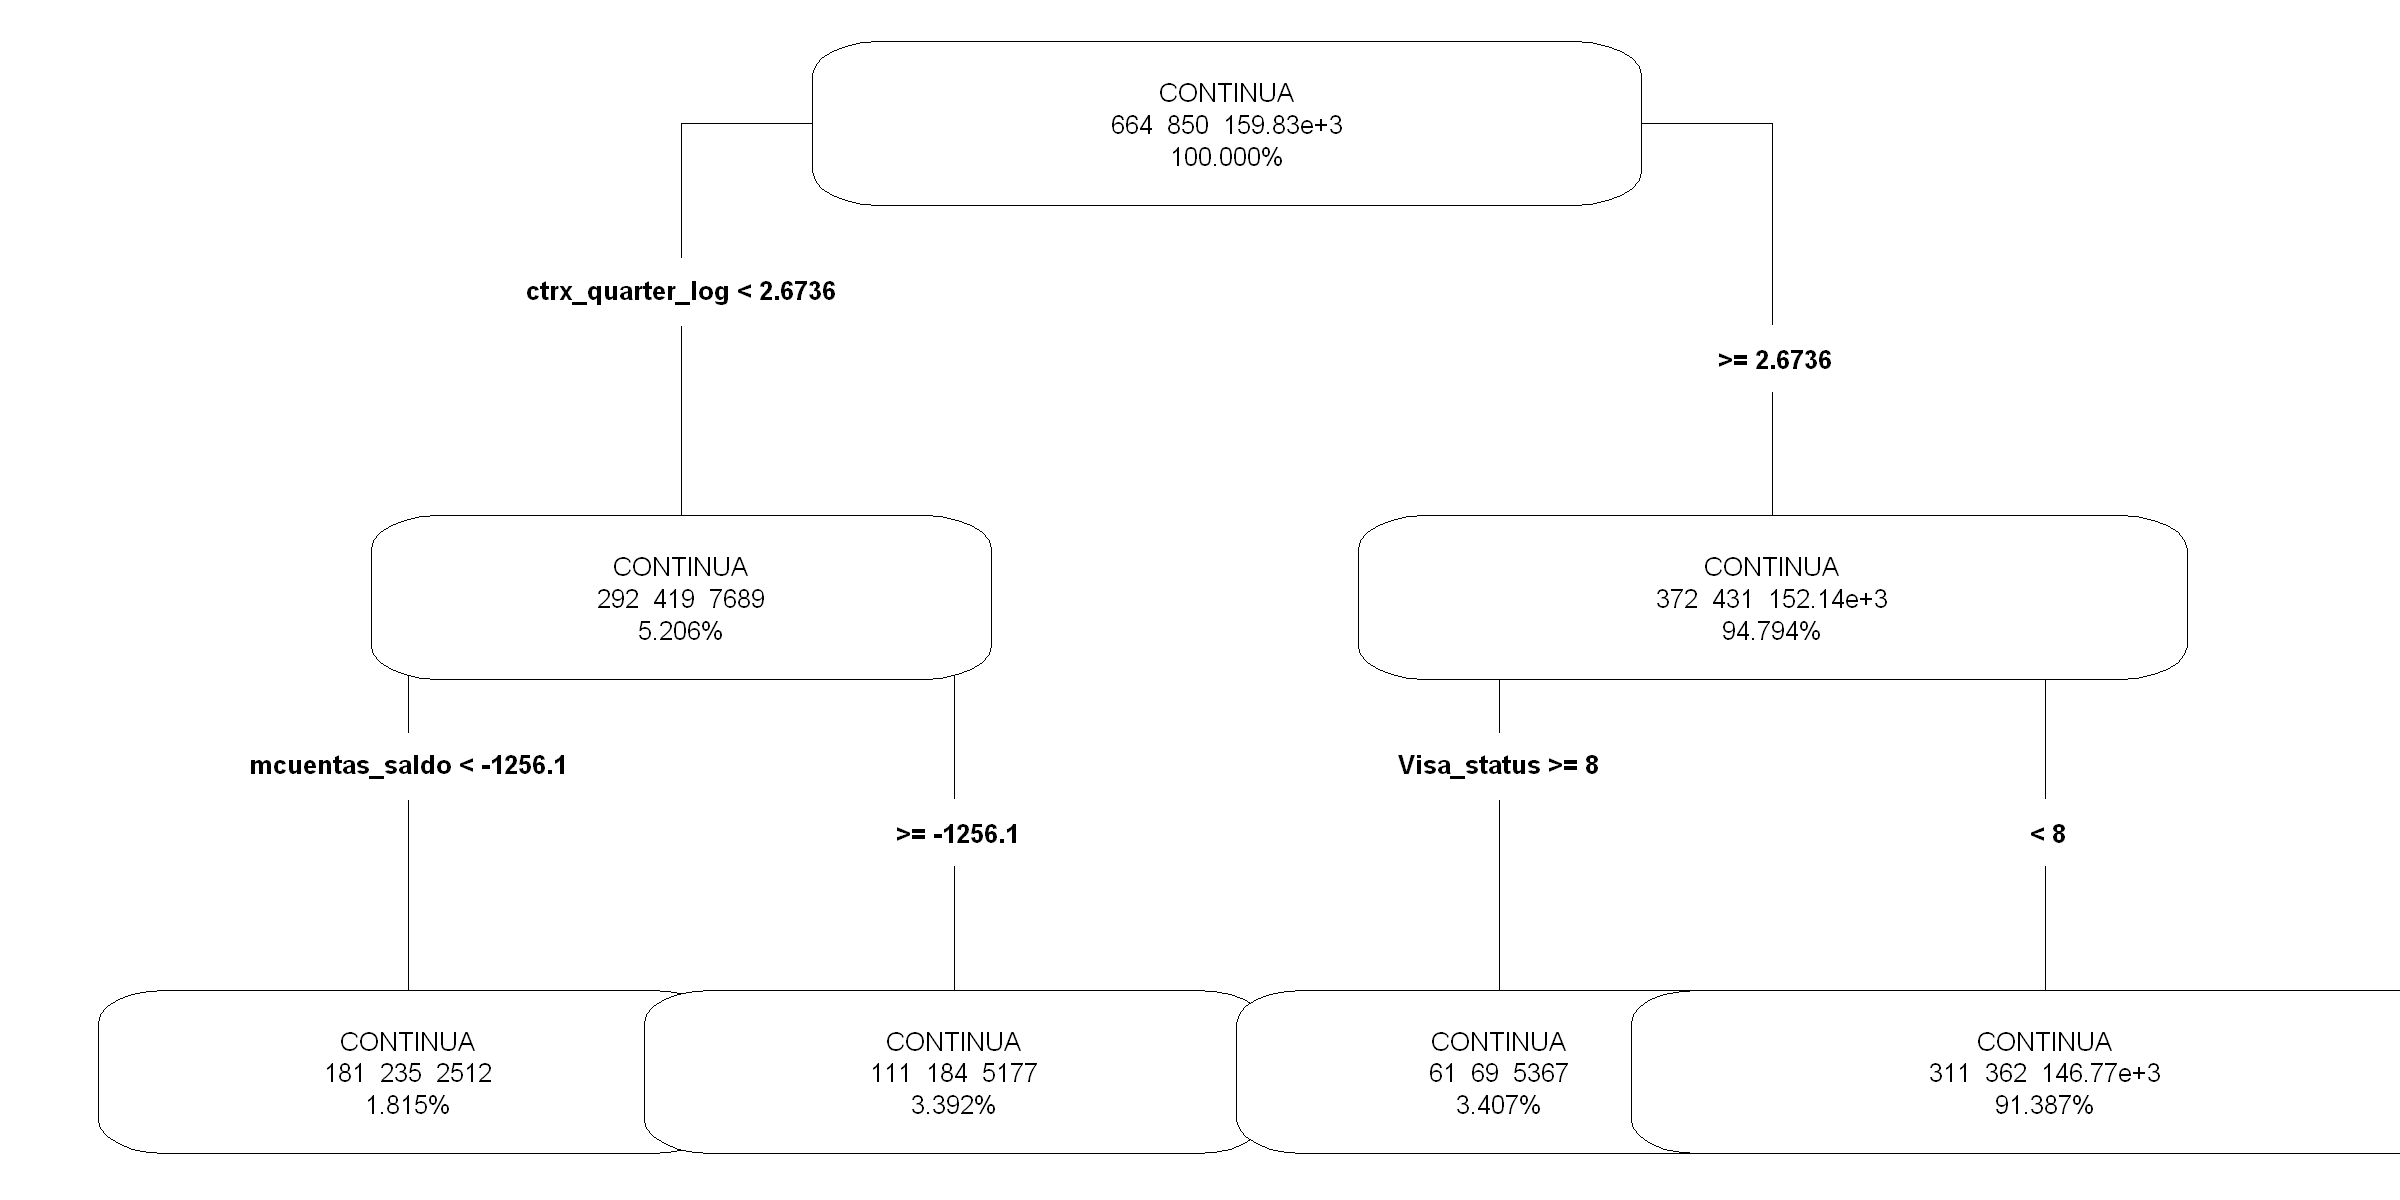

In [17]:
#genero el modelo
modelo <-  rpart(  formula= "clase_ternaria ~ . -ctrx_quarter" ,
                   data= dataset[foto_mes==202101],
                   xval= 0,
                   cp= -1,
                   maxdepth= 2 )

#imprimo el modelo graficamente
prp(modelo, extra=101, digits=5, branch=1, type=4, varlen=0, faclen=0, tweak=1.1, cex=1.2)

**SORPRENDENTE , el arbol de decision es inmune a la transformada logaritmica**
<br>
El arbol de decisión no ha cambiado. Su forma es exactamente igual, las cantidades en los nodos idéntica al arbol original.
<br>
Por supuesto, el arbol original cortaba en  ctrx_quarter < 14 y ahora corta en ctrx_quarter < 2.673 porque obviamente alteré esa variable, pero en realidad está cortando en el mismo punto.

## Outliers

Ahora fabrico outliers y veo como se comporta el arbol

Primero vuelvo a cargar el dataset

In [ ]:
dataset <- fread("./datasets/competencia1_2022.csv")   #cargo el dataset

el boxplot original

In [ ]:
boxplot(  dataset[ foto_mes==202101 , ctrx_quarter])

cuento cuantos registros hay con ctrx_quarter > 1500

In [ ]:
dataset[ foto_mes==202101 & ctrx_quarter > 1500, .N]

Ahora, a esos 12 valores los transformo en outliers extremos

In [ ]:
dataset[ foto_mes==202101 & ctrx_quarter > 1500,  ctrx_quarter := ctrx_quarter * 1000]

compruebo que sean outliers extremos

In [ ]:
boxplot(  dataset[ foto_mes==202101 , ctrx_quarter])

Finalmente, nuevamente arbol de decision

In [ ]:
#genero el modelo
modelo <-  rpart(  formula= "clase_ternaria ~ ." ,
                   data= dataset[foto_mes==202101],
                   xval= 0,
                   cp= -1,
                   maxdepth= 2 )

#imprimo el modelo graficamente
prp(modelo, extra=101, digits=5, branch=1, type=4, varlen=0, faclen=0, tweak=1.1, cex=1.2)

**SORPRENDENTE, el arbol de decision es inmune a los outliers**
<br>
El arbol de decisión no ha cambiado. Su forma es exactamente igual, las cantidades en los nodos idéntica al arbol original.
<br>

Si usted considera que fueron muy conservador convertir en outliers a tan solo 12 registros a que sean outliers, pruebe con  ctrx_quarter > 1000